## Reconstruction and Separation Plots on TIMIT

In [1]:
import numpy as np
import json
import matplotlib.pyplot as pyp
import seaborn as sns
import pandas as pd

from matplotlib.patches import Rectangle

from prettytable import PrettyTable

### 1) Reconstruction

In [4]:
list_files_recon = ['./reconstruction_innmf.json','./reconstruction_classic.json']
list_names = ['iN-NMF (2000)','NMF']

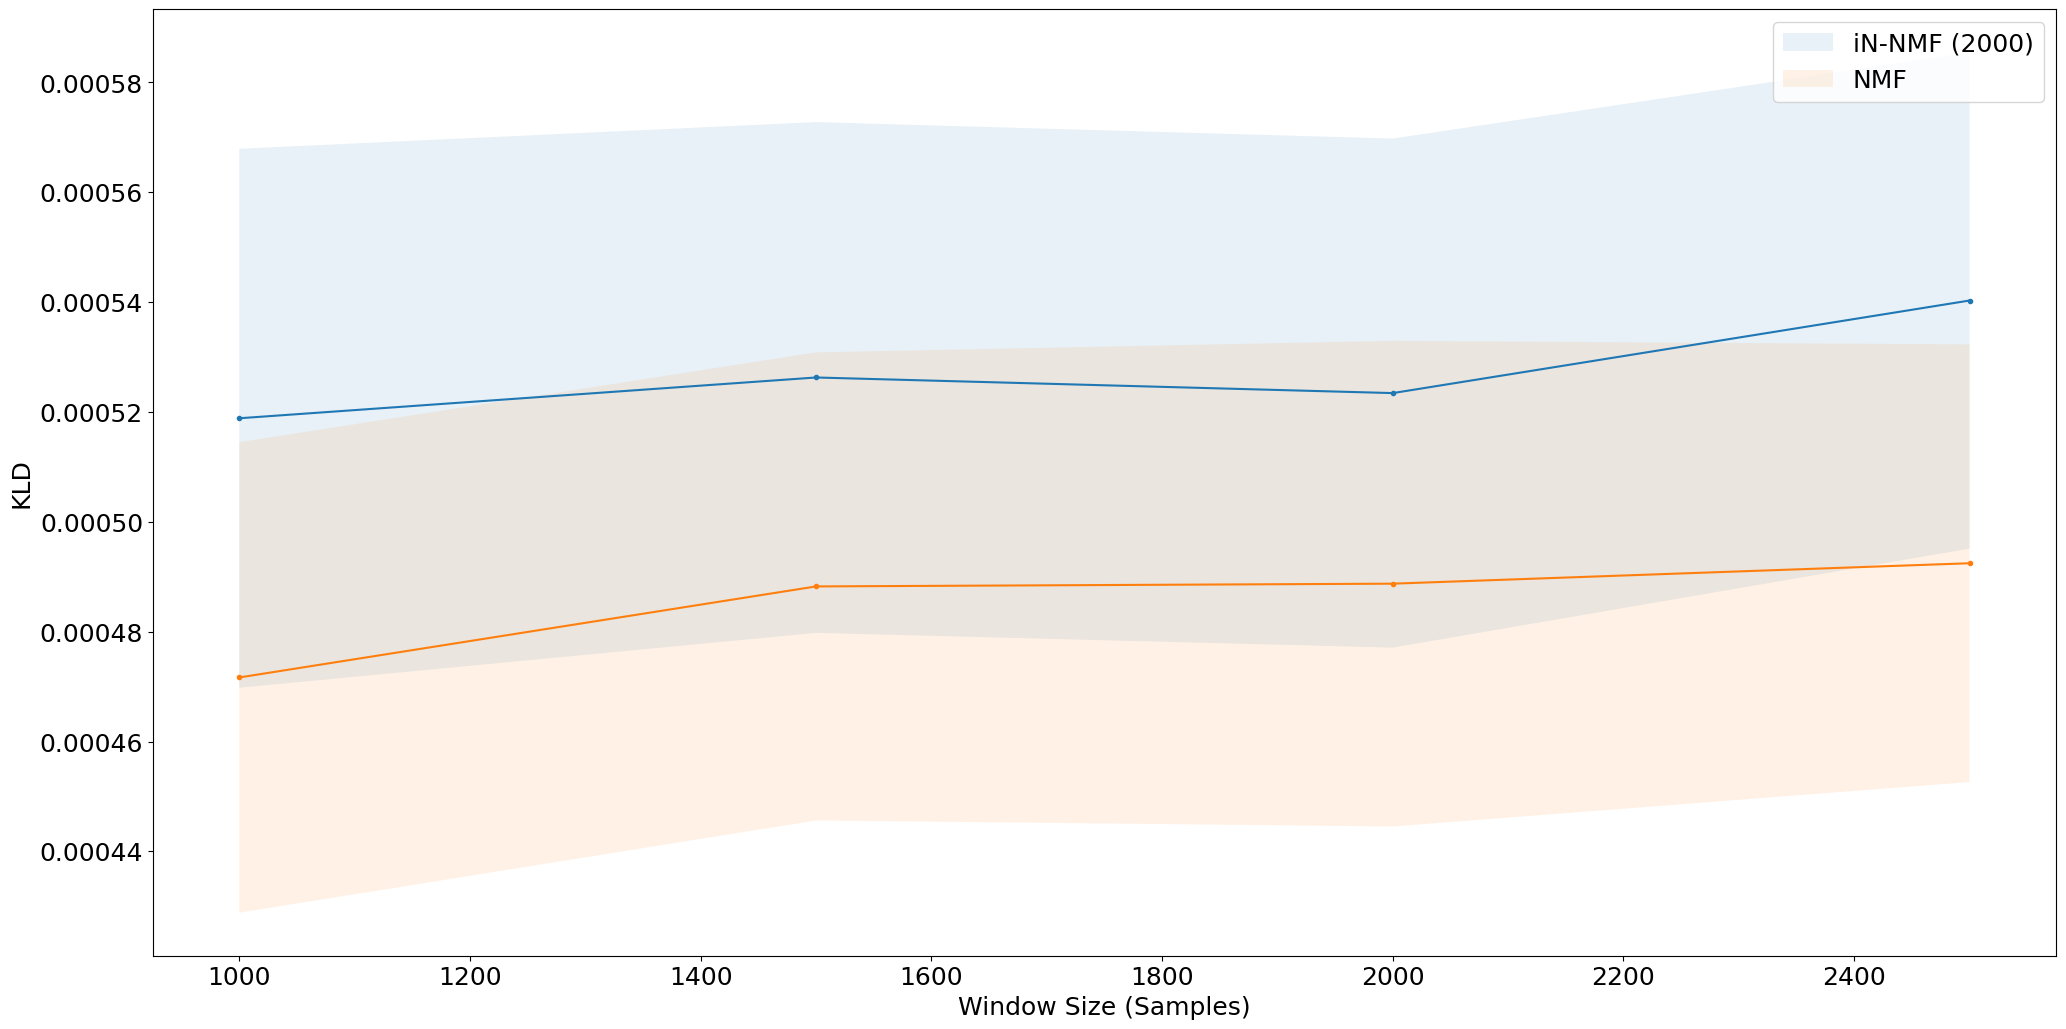

In [5]:
lD = []

pyp.figure(figsize = (20,10))
for z,f in enumerate(list_files_recon):
    with open(f, 'r') as v:
        dict_metrics = json.load(v)

    # if 'classic' in f:
        # list_N = np.arange(512,1500,64).tolist()
    # list_N = np.append(np.arange(500,1500,64),1500)
    # list_N[8] = 1000
    # else:
    list_N = dict_metrics["list_N"]
        # list_N = np.append(np.arange(500,1500,64),1500)
        # list_N[8] = 1000
    # list_metrics = ['msen_freq','sdr_freq','kld_freq','is_freq','msen_time','sdr_time']
    list_metrics = ['kld_freq']
    metrics_plot = {k:[[],[]] for k in list_metrics}
    # print(list_names[it])
    for k in list_metrics:
        for n in list_N:
            metrics_plot[k][0].append(np.nanmean(dict_metrics[str(n)][k]))
            metrics_plot[k][1].append(np.nanstd(dict_metrics[str(n)][k]))
    lD.append(metrics_plot)
    
    for it,k in enumerate(list_metrics):
        pyp.subplot(len(list_metrics),1,it+1)
        # pyp.title(k)
        # pyp.title('SDR')
        pyp.plot(list_N,metrics_plot[k][0],'.-')
        pyp.fill_between(list_N,np.array(metrics_plot[k][0]) - np.array(metrics_plot[k][1]),np.array(metrics_plot[k][0]) + np.array(metrics_plot[k][1]),alpha = 0.1,label = list_names[z])
        pyp.legend(loc = 'best',fontsize="18")
    pyp.tight_layout()
pyp.ylabel('KLD', fontsize = 18)
pyp.xlabel('Window Size (Samples)', fontsize = 18)
pyp.tick_params(axis='x', labelsize=18)
pyp.tick_params(axis='y', labelsize=18)
    

In [6]:
x = PrettyTable()
x.field_names = ["","iN-NMF","NMF"]
x.add_row([1000, str(lD[0]['kld_freq'][0][0]) + "\u00B1" + str(lD[0]['kld_freq'][1][0]), str(lD[1]['kld_freq'][0][0]) + "\u00B1" + str(lD[1]['kld_freq'][1][0])])
x.add_row([1500, str(lD[0]['kld_freq'][0][1]) + "\u00B1" + str(lD[0]['kld_freq'][1][1]), str(lD[1]['kld_freq'][0][1]) + "\u00B1" + str(lD[1]['kld_freq'][1][1])])
x.add_row([2000, str(lD[0]['kld_freq'][0][2]) + "\u00B1" + str(lD[0]['kld_freq'][1][2]), str(lD[1]['kld_freq'][0][2]) + "\u00B1" + str(lD[1]['kld_freq'][1][2])])
x.add_row([2500, str(lD[0]['kld_freq'][0][3]) + "\u00B1" + str(lD[0]['kld_freq'][1][3]), str(lD[1]['kld_freq'][0][3]) + "\u00B1" + str(lD[1]['kld_freq'][1][3])])
print(x)

+------+----------------------------------------------+----------------------------------------------+
|      |                    iN-NMF                    |                     NMF                      |
+------+----------------------------------------------+----------------------------------------------+
| 1000 | 0.0005188620402477682±4.906209977185758e-05  | 0.00047167175317751504±4.283252151023024e-05 |
| 1500 | 0.0005262861151131801±4.6495072391825324e-05 | 0.00048824662561006805±4.26096935898461e-05  |
| 2000 | 0.0005234444794477895±4.633543135924188e-05  | 0.0004887460922000854±4.420812110401226e-05  |
| 2500 | 0.0005402974666212686±4.5165409384946494e-05 | 0.0004924658563760898±3.9842197298563096e-05 |
+------+----------------------------------------------+----------------------------------------------+


### 2) Separation

Text(0.5, 162.7222222222222, 'Window Size (Samples)')

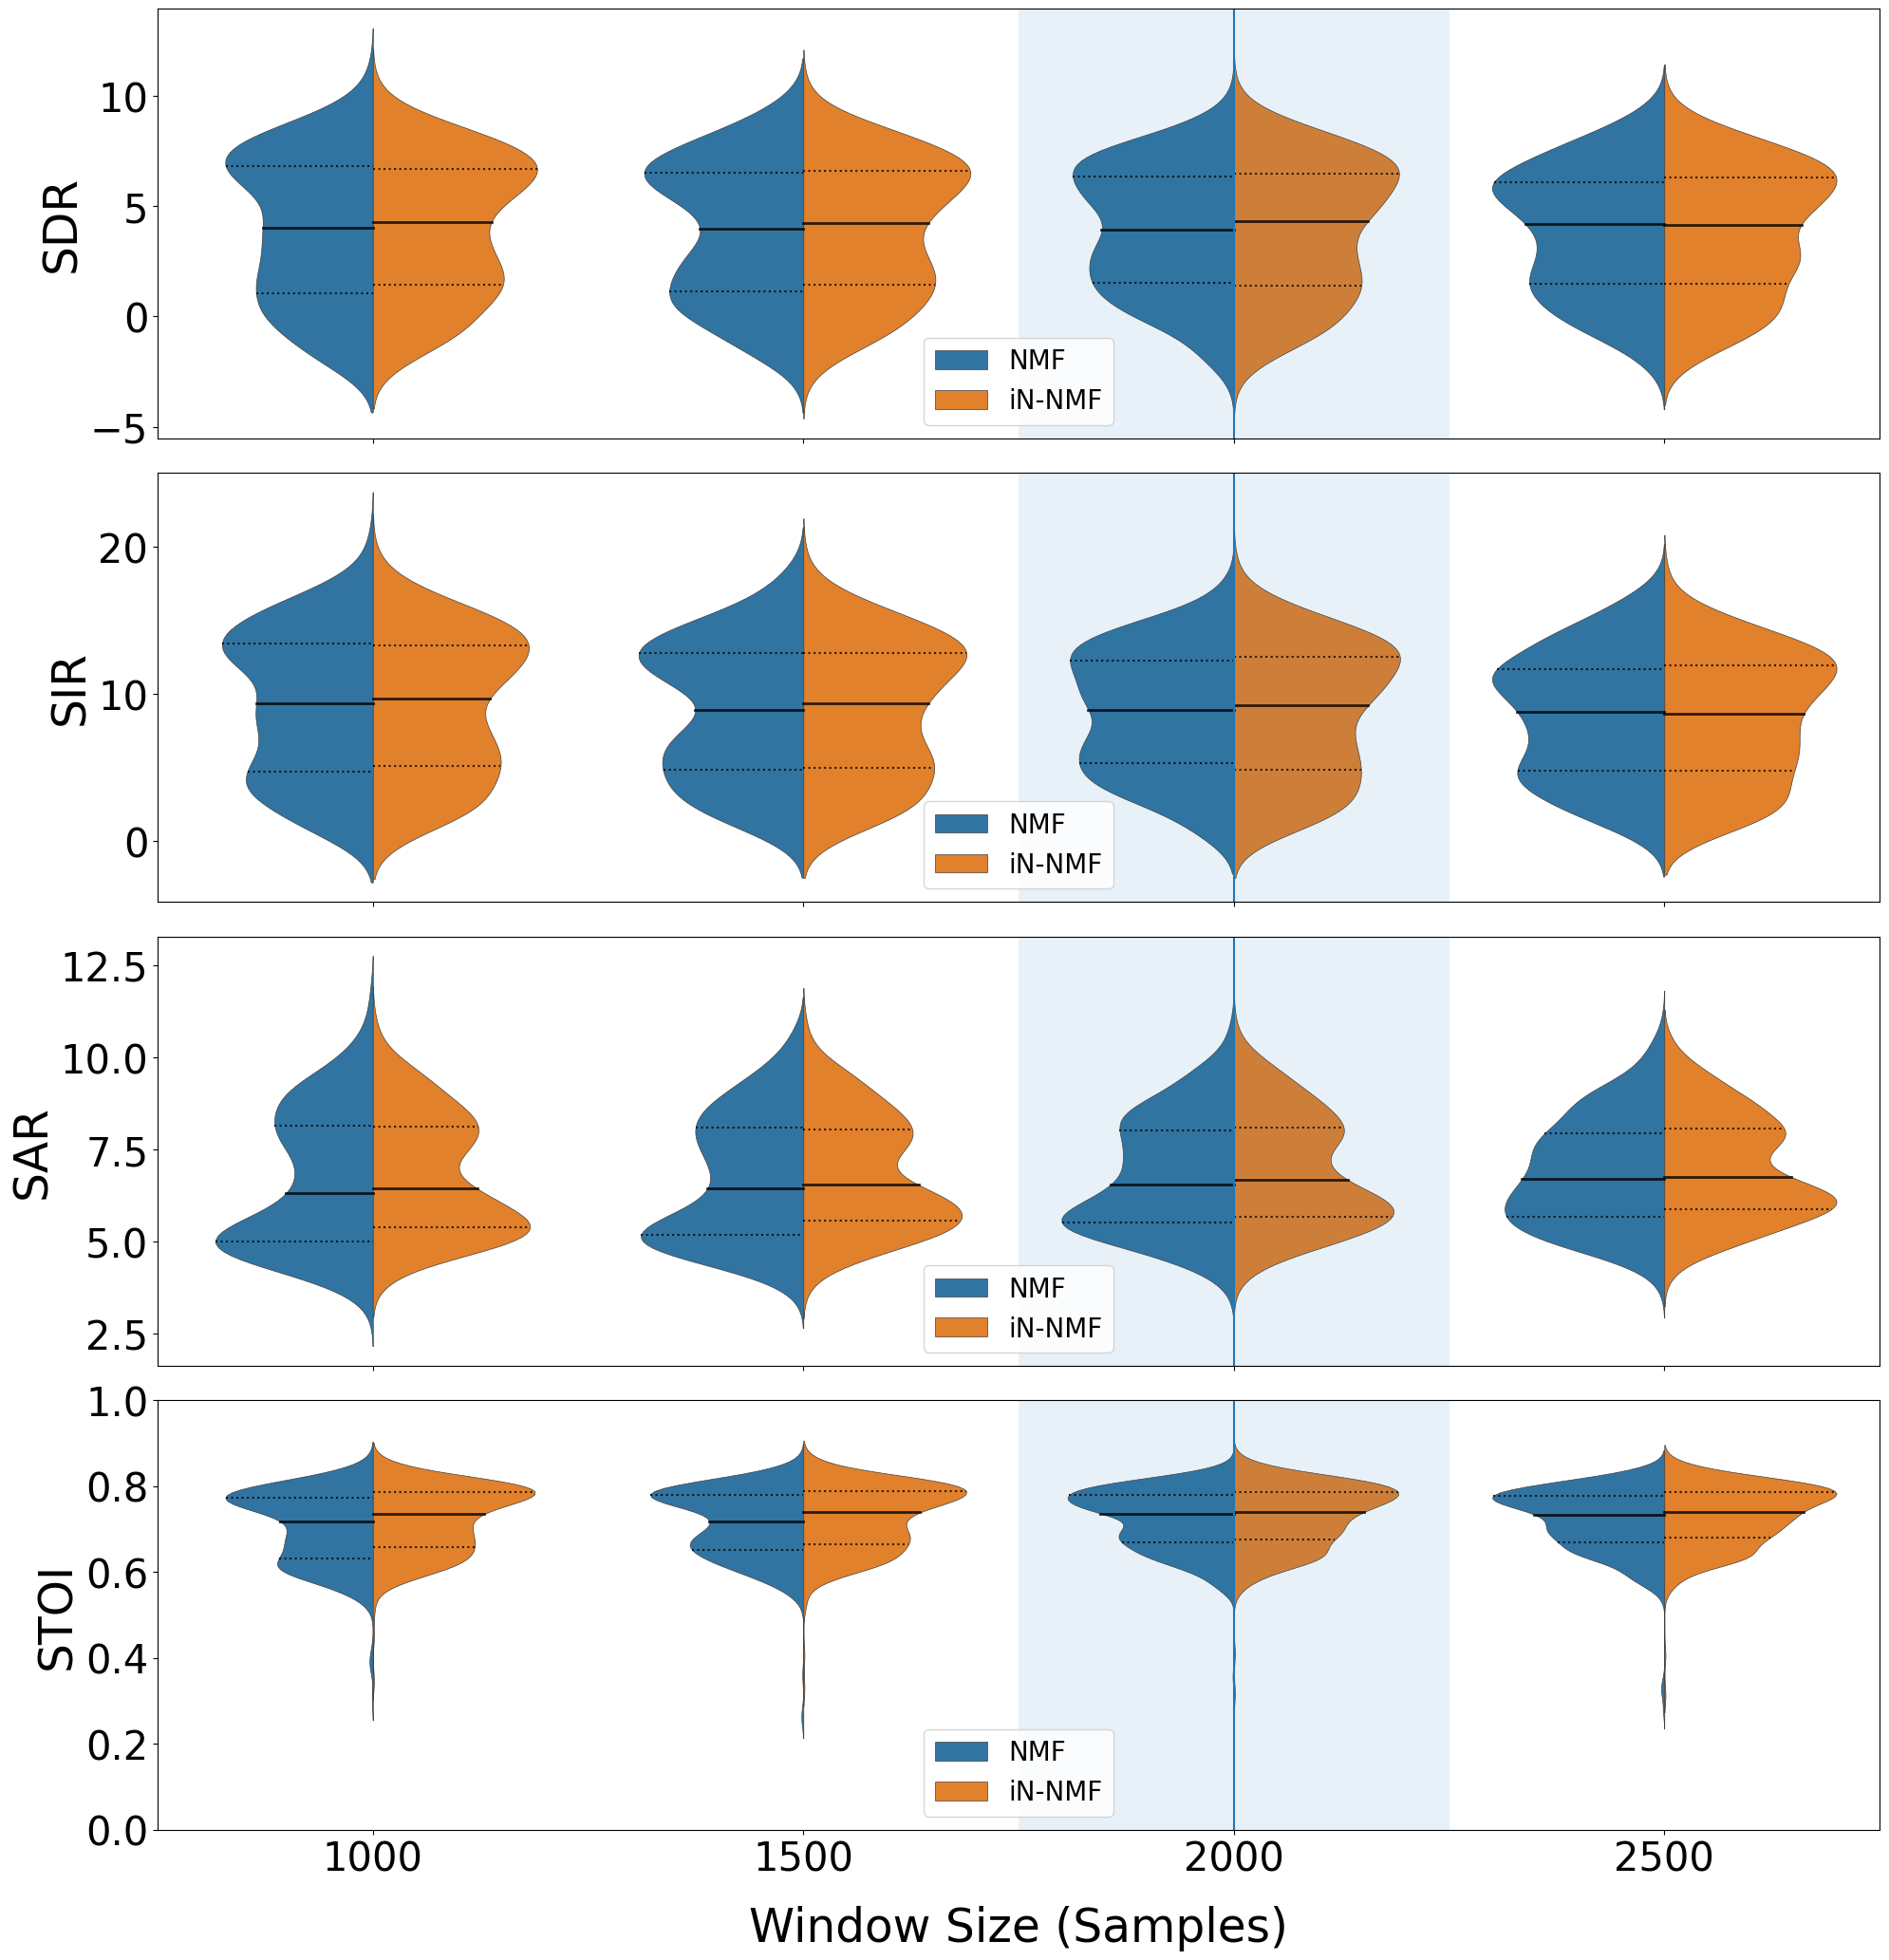

In [7]:
metrics_file_classic = './separation_classic.json'

with open(metrics_file_classic, 'r') as f:
    dict_metrics_classic = json.load(f)

metrics_file_nerf = './separation_innmf.json'

with open(metrics_file_nerf, 'r') as f:
    dict_metrics_nerf = json.load(f)

Nruns = dict_metrics_classic['Number_runs']

list_N = np.array([1000,1500,2000,2500])
# list_N = np.array([500])
list_metrics = ['sdr','sir','sar', 'stoi']

dict_plots = {"sdr" : [], "sir" : [], "sar" : [], "stoi" : [], "N" : [], "algorithm" : [] }

for n in list_N:
    for m in list_metrics:
        dict_plots[m].append(dict_metrics_classic[str(n)][m])
        dict_plots[m].append(dict_metrics_nerf[str(n)][m])
    dict_plots['N'].append([n]*Nruns*2)
    dict_plots['algorithm'].append(["NMF"]*Nruns + ["iN-NMF"]*Nruns)

dict_plots['sdr'] = np.concatenate(dict_plots['sdr'])
dict_plots['sir'] = np.concatenate(dict_plots['sir'])
dict_plots['sar'] = np.concatenate(dict_plots['sar'])
dict_plots['stoi'] = np.concatenate(dict_plots['stoi'])

dict_plots['N'] = np.concatenate(dict_plots['N'])
dict_plots['algorithm'] = np.concatenate(dict_plots['algorithm'])

dF = pd.DataFrame(dict_plots)

# list_N = np.array([500,750,1024,1250,1500])
list_metrics = ['sdr','sir','sar', 'stoi']

pyp.figure(figsize=(20,20))
# pyp.title("Left: NMF, Right: iN-NMF", fontsize = 50)
for it,k in enumerate(list_metrics):
    # for n in list_N:
    pyp.subplot(len(list_metrics),1,it+1)
    # pyp.title(k.upper(),fontsize = 50)
    # df = pd.DataFrame({'classic':dict_metrics_classic["500"][k], 'nerf':dict_metrics_nerf["500"][k], 'N': [512]*100})
    # sns.boxplot(data=dF,fill=False,x = "N",y = k,hue="algorithm",showfliers=False,legend=False)
    # if (it == 0 or it == 1 or it == 2):
    ax = sns.violinplot(data=dF,fill=True,x = "N",y = k,split=True,hue="algorithm",inner='quart',legend=True,linewidth=0.5)
    # else:
        # ax = sns.violinplot(data=dF,fill=True,x = "N",y = k,split=True,hue="algorithm",inner='quart',legend=True,linewidth=0.5)
    ax.legend(loc='lower center',ncol=1,fontsize=20)
    patch = Rectangle([1.5,-10],1,40,fill=True,alpha=0.1)
    pyp.gca().add_patch(patch)
    # ax.axvline(x = 2000)
    # for l in ax.lines:
    #     l.set_linestyle(':')
    #     # l.set_color('black')
    #     l.set_linewidth(2)
    #     l.set_alpha(1)
    for l in ax.lines:
        l.set_linestyle(':')
        l.set_linewidth(1.5)
        l.set_color('black')
        l.set_alpha(0.8)
    for l in ax.lines[1::3]:
        l.set_linestyle('-')
        l.set_linewidth(2)
        l.set_color('black')
        l.set_alpha(0.8)
    pyp.xlabel("")
    pyp.ylabel("")
    pyp.axvline(2)
    # pyp.axvline(3.5,'-')
    # if(it == 0):
        # pyp.title('Left: NMF, Right: iN-NMF (trained only on N = 2000)',fontsize = 40)
        # pyp.yticks([-2,0,2,4,6,8,10])
    if (it == 0 or it == 1 or it == 2):
        # pyp.xticks([])
        # pyp.ylim([-5,25])
        # pyp.yticks([])
        ax.set_xticklabels([])
    if (it == 3):
        pyp.ylim([0,1])
    # if k == 'stoi':
        # pyp.ylabel(k.upper() + " (%)", fontsize = 40)
    # else:
    pyp.ylabel(k.upper(), fontsize = 35)
    # pyp.yaxis.set_label_position("right")
    pyp.tick_params(axis='x', labelsize=30)
    pyp.tick_params(axis='y', labelsize=30)
    # pyp.set_aspect('equal')
    # pyp.grid('on')
    # pyp.legend(loc = 'upper left',fontsize=35, fancybox=True, framealpha=0.5)
    # sns.violinplot(data=dF,fill=False,x = "N",y = k,hue="algorithm",split = True, gap = 0.1,)
    # sns.boxplot(data=dF,fill=False,x = "N",y = "classic",split = True, gap = 0.1,)
pyp.tight_layout()
# pyp.subplots_adjust(hspace=0.1)
# pyp.xticks(list_N)
pyp.xlabel('Window Size (Samples)', fontsize = 35, labelpad=20)